In [1]:
import pandas as pd
from fbprophet import Prophet
from etl_resources import sqlite_connection
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [2]:
def base_df():
    
    '''
    This function returns the base time series dataframe (date and close)
    '''
    
    con = sqlite_connection()
        
    df = pd.read_sql("select * from weekly_prices_clean where ticker='AMZN' and date>'2017-12-31'",con=con)
    
    df[['ds', 'y']] = df[['date','close']]
    df = df[['ds', 'y']]
        
    return df

In [3]:
def train_test_split(df, split=0.2):
    
    test_rows = int(round(df.shape[0] * split,0))
    train_rows = df.shape[0] - test_rows
    
    test_df = df.head(test_rows).copy()
    train_df = df.tail(train_rows).copy()
    
    return train_df, test_df

Initial log joint probability = -3.27786
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       977.845      0.011102       1463.89      0.1347           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1008.83     0.0055246       641.559      0.3554           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1018.28    0.00180053       156.606           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     344       1021.62   0.000107315       231.971   6.236e-07       0.001      473  LS failed, Hessian reset 
     399       1022.97    0.00799314       219.712           1           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     444       1024.17   0.000167247    

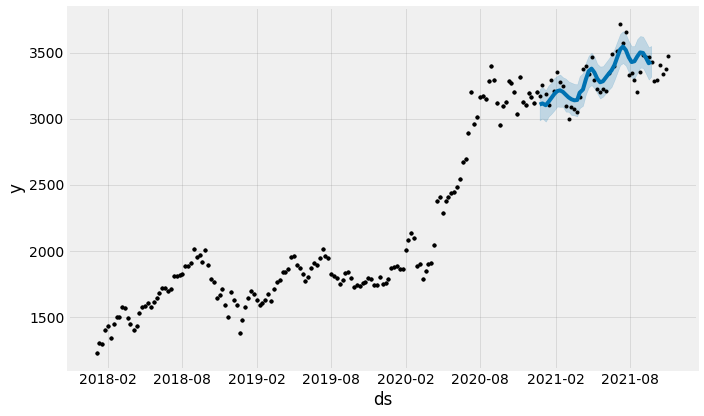

In [4]:
df = base_df()
train, test = train_test_split(df, split=0.1)
model = Prophet(daily_seasonality=True)
model.fit(train)
forecast = model.predict(test)
forecast.tail()

fig = model.plot(forecast)

In [5]:
print("Mean Squared Error (MSE):", mean_squared_error(y_true = test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = test["y"], y_pred = forecast['yhat']))

def mean_abs_perc_err(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(test["y"]), y_pred = np.asarray(forecast['yhat'])))

Mean Squared Error (MSE): 80068.64691668536
Mean Absolute Error (MAE): 242.59450738875535
Mean Absolute % Error (MAPE):  7.336486488239482
